In [1]:
from Clusters import data
f = "/sps/lsst/data/clusters/MACSJ2243.3-0935/analysis/output_v1/MACSJ2243.3-0935_data.hdf5"
d = data.read_data(f)
fc = d['deepCoadd_forced_src']

In [2]:
print d.keys()

['deepCoadd_forced_src', 'wcs', 'deepCoadd_meas']


In [3]:
print fc

base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated ... coord_dec_deg 
                                                       ...      deg      
------------------------------------------------------ ... --------------
                                                 False ... -9.50417299504
                                                  True ... -9.50631091083
                                                  True ... -9.50631273401
                                                  True ... -9.50632589495
                                                  True ...  -9.5063327395
                                                 False ...  -9.5062460577
                                                  True ... -9.50629874096
                                                  True ... -9.50635437897
                                                 False ... -9.50600120865
                                                 False ... -9.50549567214
                                      

In [4]:
N = len(fc)
print N, "rows"

1050500 rows


In [5]:
filters = set(fc['filter'])
nf = len(filters)
print nf, "filters:", filters 

5 filters: set(['i', 'r', 'u', 'z', 'g'])


In [6]:
ns = N / nf
print ns, "sources"

210100 sources


In [7]:
print "%i columns" % len(fc.keys())
for k in sorted(fc.keys())[:10]:
    print k

207 columns
base_CircularApertureFlux_12_0_flag
base_CircularApertureFlux_12_0_flag_apertureTruncated
base_CircularApertureFlux_12_0_flux
base_CircularApertureFlux_12_0_fluxSigma
base_CircularApertureFlux_12_0_mag
base_CircularApertureFlux_12_0_magSigma
base_CircularApertureFlux_17_0_flag
base_CircularApertureFlux_17_0_flag_apertureTruncated
base_CircularApertureFlux_17_0_flux
base_CircularApertureFlux_17_0_fluxSigma


In [8]:
magi = fc['modelfit_CModel_mag'][fc['filter'] == 'i']
magr = fc['modelfit_CModel_mag'][fc['filter'] == 'r']

and plot them against each other

In [9]:
# ignore the following line
%matplotlib inline

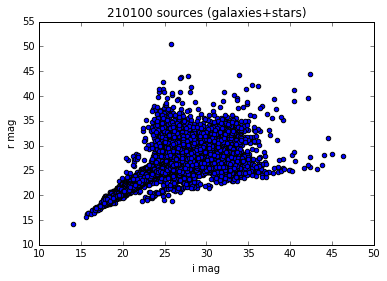

In [10]:
import pylab
pylab.scatter(magi, magr)
pylab.xlabel('i mag')
pylab.ylabel('r mag')
pylab.title('%i sources (galaxies+stars)' % len(magi))

In [11]:
# ignore the following line
import warnings; warnings.filterwarnings("ignore")

In [12]:
data_filtered = data.filter_table(d)
fc_filtered = data_filtered['deepCoadd_forced_src']

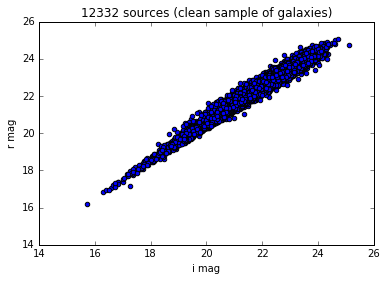

In [13]:
magi_filtered = fc_filtered['modelfit_CModel_mag'][fc_filtered['filter'] == 'i']
magr_filtered = fc_filtered['modelfit_CModel_mag'][fc_filtered['filter'] == 'r']
pylab.scatter(magi_filtered, magr_filtered)
pylab.xlabel('i mag')
pylab.ylabel('r mag')
pylab.title('%i sources (clean sample of galaxies)' % len(magi_filtered))

In [14]:
from astropy.table import Column

In [15]:
shifted_mags = fc_filtered['modelfit_CModel_mag'] + 2

In [16]:
fc_filtered.add_column(Column(name='shifted_mag', data=shifted_mags,
                              description='Shifted magnitude', unit='mag'))

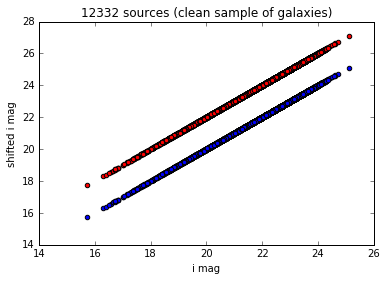

In [17]:
magi_filtered = fc_filtered['modelfit_CModel_mag'][fc_filtered['filter'] == 'i']
magi_shifted =  fc_filtered['shifted_mag'][fc_filtered['filter'] == 'i']
pylab.scatter(magi_filtered, magi_filtered)
pylab.scatter(magi_filtered, magi_shifted, c='r')
pylab.xlabel('i mag')
pylab.ylabel('shifted i mag')
pylab.title('%i sources (clean sample of galaxies)' % len(magi_filtered))

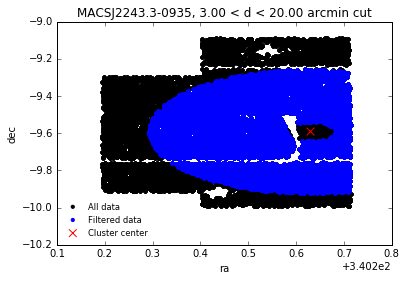

In [24]:
confile = '/sps/lsst/data/clusters/MACSJ2243.3-0935/analysis/output_v1/MACSJ2243.3-0935.yaml'
config = data.load_config(confile) 
output = data.filter_around(fc_filtered, config, exclude_outer=20, exclude_inner=3, unit='arcmin')

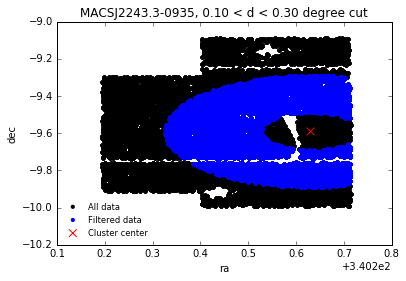

In [26]:
output = data.filter_around(fc_filtered, config, exclude_outer=0.3, exclude_inner=0.1, unit='degree')